What is the average number of steps before the first reward is obtained across all successful episodes?

This program uses Gymnasium’s Atari Learning Environment (ALE) to run multiple episodes of the game “Superman”. In each episode, a random agent interacts with the environment by taking random actions. The script visualizes gameplay using Matplotlib and records the number of steps it takes to obtain the first reward.

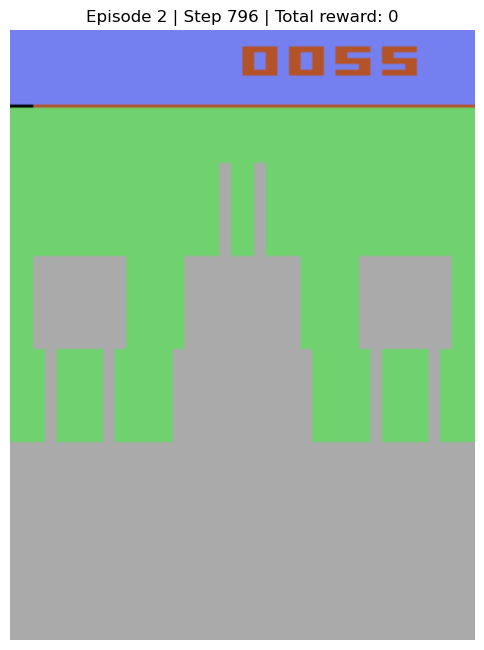

In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time
import ale_py
import numpy as np

# --- Create environment ---
env = gym.make("ALE/Superman-v5", render_mode="rgb_array")

n_episodes = 5       # Number of episodes to play
max_steps = 1000     # Max steps per episode
frame_delay = 0.03   # 30ms delay ≈ 33fps

steps_to_reward = []

# --- Prepare display ---
fig, ax = plt.subplots(figsize=(6, 8))
ax.axis("off")

for episode in range(n_episodes):
    observation, info = env.reset()
    total_reward = 0
    got_reward = False

    print(f"\n🎬 Episode {episode+1}/{n_episodes} starting...")

    for step in range(max_steps):
        # Random action (replace with your own agent/policy if desired)
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        # --- Visual update ---
        frame = env.render()
        clear_output(wait=True)
        ax.clear()
        ax.imshow(frame)
        ax.set_title(f"Episode {episode+1} | Step {step} | Total reward: {total_reward:.0f}")
        ax.axis("off")
        display(fig)
        time.sleep(frame_delay)

        # --- Record first reward ---
        if reward != 0 and not got_reward:
            steps_to_reward.append(step + 1)
            got_reward = True
            print(f"💰 Reward obtained at step {step+1}")

        # --- End of episode ---
        if terminated or truncated:
            break

    if not got_reward:
        steps_to_reward.append(np.nan)
        print("⚠️ No reward obtained this episode.")

plt.close(fig)
env.close()

# --- Report average ---
valid_steps = [s for s in steps_to_reward if not np.isnan(s)]
if valid_steps:
    avg_steps = np.mean(valid_steps)
    print(f"\n✅ Average steps to first reward: {avg_steps:.2f} (across {len(valid_steps)} successful episodes)")
else:
    print("\n⚠️ No rewards obtained in any episode.")


In [ ]:
import numpy as np

# Assuming 'steps_to_reward' was collected from the main simulation code

# --- Filter valid results (episodes where a reward was obtained) ---
valid_steps = [s for s in steps_to_reward if not np.isnan(s)]

# --- Compute and display statistics ---
if valid_steps:
    avg_steps = np.mean(valid_steps)
    median_steps = np.median(valid_steps)
    min_steps = np.min(valid_steps)
    max_steps = np.max(valid_steps)
    std_steps = np.std(valid_steps)

    print("📊 --- Reward Timing Statistics ---")
    print(f"Number of successful episodes: {len(valid_steps)}")
    print(f"Average steps to first reward: {avg_steps:.2f}")
    print(f"Median steps to first reward:  {median_steps:.2f}")
    print(f"Minimum steps:                {min_steps}")
    print(f"Maximum steps:                {max_steps}")
    print(f"Standard deviation:           {std_steps:.2f}")

    print("\n✅ Conclusion:")
    print(f"On average, the first reward was obtained after {avg_steps:.2f} steps "
          f"across {len(valid_steps)} successful episodes.")
else:
    print("⚠️ No rewards were obtained in any episode. Unable to compute average steps.")
